####**3. Выбор и обучение моделей**

In [182]:
import numpy as np
import pandas as pd

In [183]:
# Загрузка DataFrame из сохраненного CSV-файла
df = pd.read_csv('composit_boxcox.csv')
df.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,70.0,3000.0,220.0,4.0,57.0,1.0,0.0,44.070787
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,70.0,3000.0,220.0,4.0,60.0,1.0,0.0,44.070787
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,70.0,3000.0,220.0,4.0,70.0,1.0,0.0,44.070787
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,70.0,3000.0,220.0,5.0,47.0,1.0,0.0,44.070787
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,70.0,3000.0,220.0,5.0,57.0,1.0,0.0,44.070787


In [184]:
#numerical = ['Matrix-Filler Ratio','Density', 'Elastic Modulus', 'Curing Agent Quantity', \
#        'Epoxy Groups Content', 'Flash Point Temperature', 'Resin Consumption', 'Layup Step', 'Surface Density_boxcox', \
#         'Layup Density', 'Layup_0',  'Layup_90', 'Curing Agent Quantity_box_plot_outlier','Epoxy Groups Content_box_plot_outlier',\
#         'Flash Point Temperature_box_plot_outlier','Surface Density_box_plot_outlier','Resin Consumption_box_plot_outlier',\
#          'Layup Step_box_plot_outlier','Layup Density_box_plot_outlier',]

In [185]:
numerical = ['Matrix-Filler Ratio','Density', 'Elastic Modulus', 'Curing Agent Quantity', \
        'Epoxy Groups Content', 'Flash Point Temperature', 'Resin Consumption', 'Layup Step', 'Surface Density_boxcox', \
         'Layup Density', 'Layup_0',  'Layup_90', ]

In [186]:
# Выбираем только числовые признаки
numerical_df = df[numerical]

In [187]:
# Количественно выбросы можно найти через стандартизированную оценку (z-оценку, z-score).
# Эта оценка показывает на сколько средних квадратических отклонений значение отличается от среднего
from scipy import stats
z = stats.zscore(df[numerical])
z=pd.DataFrame(z,columns=df[numerical].columns)
z.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Resin Consumption,Layup Step,Surface Density_boxcox,Layup Density,Layup_0,Layup_90
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,0.02641,-1.131530,-0.933204,-0.012469,0.983518,-0.983518
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,0.02641,-1.131530,-0.933204,0.230546,0.983518,-0.983518
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,0.02641,-1.131530,-0.933204,1.040595,0.983518,-0.983518
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,0.02641,-0.741243,-0.933204,-0.822518,0.983518,-0.983518
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,0.02641,-0.741243,-0.933204,-0.012469,0.983518,-0.983518


In [188]:
# Общее количество выбросов в наборе данных
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), где хотя бы одно значение True (т.е. > 3)
numerical_df[(np.abs(z) > 3).any(axis = 1)]

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Resin Consumption,Layup Step,Surface Density_boxcox,Layup Density,Layup_0,Layup_90
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,220.000000,4.000000,44.070787,57.000000,1.0,0.0
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,220.000000,4.000000,44.070787,70.000000,1.0,0.0
19,3.532338,1980.000000,1183.000000,111.860000,22.267857,284.615385,300.000000,0.000000,120.319765,0.000000,1.0,0.0
41,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,227.022557,7.401543,32.128075,19.250533,1.0,0.0
100,3.565855,2207.773481,696.149163,94.187613,23.562885,291.803991,402.163809,4.512825,65.043069,46.775469,1.0,0.0
140,0.790499,2054.123810,876.794802,116.889391,23.564969,353.561943,247.193190,5.506840,90.360342,98.202603,1.0,0.0
211,2.696183,1959.779639,26.827000,132.031952,19.868797,349.726171,414.590628,12.287666,79.569407,73.044781,1.0,0.0
257,3.027269,1959.011062,916.441601,17.740275,21.965568,279.518623,245.687212,5.721782,77.793917,71.172863,1.0,0.0
279,4.434429,2061.918771,328.876626,81.071393,23.213218,244.874100,178.066150,2.788476,114.553265,11.740126,1.0,0.0
298,2.385109,2129.059629,589.782966,70.760954,14.254985,302.043927,92.307158,4.650262,93.230537,63.956692,1.0,0.0


In [189]:
# Выводим количество выбросов по каждому признаку
outliers_count = (np.abs(z) > 3).sum()
print(outliers_count)

Matrix-Filler Ratio        0
Density                    3
Elastic Modulus            2
Curing Agent Quantity      2
Epoxy Groups Content       2
Flash Point Temperature    3
Resin Consumption          3
Layup Step                 0
Surface Density_boxcox     0
Layup Density              7
Layup_0                    0
Layup_90                   0
dtype: int64


In [190]:
# без выбросов
outlier_mask = (np.abs(z) > 3).any(axis=1)

df_without_outliers = df[~outlier_mask]
df_without_outliers

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,70.000000,3000.000000,220.000000,4.000000,60.000000,1.0,0.0,44.070787
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,70.000000,3000.000000,220.000000,5.000000,47.000000,1.0,0.0,44.070787
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,57.000000,1.0,0.0,44.070787
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,60.000000,1.0,0.0,44.070787
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,70.000000,1.0,0.0,44.070787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,73.090961,2387.292495,125.007669,9.076380,47.019770,0.0,1.0,43.962022
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,72.920827,2360.392784,117.730099,10.565614,53.750790,0.0,1.0,61.301220
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,74.734344,2662.906040,236.606764,4.161154,67.629684,0.0,1.0,98.761020
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,74.042708,2071.715856,197.126067,6.313201,58.261074,0.0,1.0,90.165374


In [191]:
df=df_without_outliers.copy()
df

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,70.000000,3000.000000,220.000000,4.000000,60.000000,1.0,0.0,44.070787
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,70.000000,3000.000000,220.000000,5.000000,47.000000,1.0,0.0,44.070787
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,57.000000,1.0,0.0,44.070787
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,60.000000,1.0,0.0,44.070787
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,70.000000,3000.000000,220.000000,5.000000,70.000000,1.0,0.0,44.070787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,73.090961,2387.292495,125.007669,9.076380,47.019770,0.0,1.0,43.962022
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,72.920827,2360.392784,117.730099,10.565614,53.750790,0.0,1.0,61.301220
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,74.734344,2662.906040,236.606764,4.161154,67.629684,0.0,1.0,98.761020
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,74.042708,2071.715856,197.126067,6.313201,58.261074,0.0,1.0,90.165374


In [192]:
# Выделение переменных X и Y
#X = df[['Matrix-Filler Ratio','Density', 'Elastic Modulus', 'Curing Agent Quantity', \
#        'Epoxy Groups Content', 'Flash Point Temperature', 'Resin Consumption', 'Layup Step', 'Surface Density_boxcox', \
#         'Layup Density', 'Layup_0',  'Layup_90', 'Curing Agent Quantity_box_plot_outlier','Epoxy Groups Content_box_plot_outlier',\
#         'Flash Point Temperature_box_plot_outlier','Surface Density_box_plot_outlier','Resin Consumption_box_plot_outlier',\
 #         'Layup Step_box_plot_outlier','Layup Density_box_plot_outlier', ]]
#y_1 = df[['Tensile Elastic Modulus']]
#y_2 = df[['Tensile Strength']]

In [193]:
# Выделение переменных X и Y
X = df[['Matrix-Filler Ratio','Density', 'Elastic Modulus', 'Curing Agent Quantity', \
        'Epoxy Groups Content', 'Flash Point Temperature', 'Resin Consumption', 'Layup Step', 'Surface Density_boxcox', \
         'Layup Density', 'Layup_0',  'Layup_90',]]
y_1 = df[['Tensile Elastic Modulus']]
y_2 = df[['Tensile Strength']]

In [194]:
X.tail(3)

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Resin Consumption,Layup Step,Surface Density_boxcox,Layup Density,Layup_0,Layup_90
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,236.606764,4.161154,98.761020,67.629684,0.0,1.0
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,197.126067,6.313201,90.165374,58.261074,0.0,1.0
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,194.754342,6.078902,100.332582,77.434468,0.0,1.0


In [195]:
y_1.head(3)

,Tensile Elastic Modulus
1,70.0
3,70.0
4,70.0


In [196]:
from sklearn import preprocessing

In [197]:
scaler_x = preprocessing.StandardScaler()
scaler_y_1 = preprocessing.StandardScaler()

In [198]:
scaled_X = scaler_x.fit_transform(X)
scaled_X

array([[-1.19007779e+00,  7.48809670e-01,  1.52149658e-03, ...,
         2.30114374e-01,  9.94029797e-01, -9.94029797e-01],
       [-1.19007779e+00,  7.48809670e-01,  1.52149658e-03, ...,
        -8.68601741e-01,  9.94029797e-01, -9.94029797e-01],
       [-1.83512524e-01,  7.48809670e-01,  4.51042038e-02, ...,
        -2.34354985e-02,  9.94029797e-01, -9.94029797e-01],
       ...,
       [ 3.77222055e-01, -4.21728696e-02, -9.82081675e-01, ...,
         8.74949524e-01, -1.00600606e+00,  1.00600606e+00],
       [ 8.44888687e-01,  1.25391855e+00,  9.88982958e-03, ...,
         8.31462115e-02, -1.00600606e+00,  1.00600606e+00],
       [ 9.57932007e-01, -1.16713687e+00, -9.80615871e-01, ...,
         1.70361676e+00, -1.00600606e+00,  1.00600606e+00]])

In [199]:
scaled_y_1 = scaler_y_1.fit_transform(y_1)
scaled_y_1[:3]

array([[-1.06728608],
       [-1.06728608],
       [-1.06728608]])

In [200]:
scaled_X.shape

(1002, 12)

In [201]:
scaled_y_1.shape

(1002, 1)

In [202]:
scaled_y_1[:, 0].shape

(1002,)

In [203]:
X_df = pd.DataFrame(scaled_X, columns=X.columns)
X_df

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Resin Consumption,Layup Step,Surface Density_boxcox,Layup Density,Layup_0,Layup_90
0,-1.190078,0.748810,0.001521,-2.184713,0.635935,-0.031399,0.027549,-1.138885,-0.932400,0.230114,0.994030,-0.994030
1,-1.190078,0.748810,0.001521,0.653699,-0.414108,0.350929,0.027549,-0.747533,-0.932400,-0.868602,0.994030,-0.994030
2,-0.183513,0.748810,0.045104,0.037871,0.013409,-0.031399,0.027549,-0.747533,-0.932400,-0.023435,0.994030,-0.994030
3,-0.187270,0.337034,0.029826,0.037871,0.013409,-0.031399,0.027549,-0.747533,-0.932400,0.230114,0.994030,-0.994030
4,-0.405606,-0.898295,0.210107,0.037871,0.013409,-0.031399,0.027549,-0.747533,-0.932400,1.075281,0.994030,-0.994030
...,...,...,...,...,...,...,...,...,...,...,...,...
997,-0.734020,-0.320602,0.533561,-0.855611,-0.887363,0.966611,-1.584622,0.847767,-0.936095,-0.866931,-1.006006,1.006006
998,0.557153,1.024551,-0.896842,1.263849,-1.107234,-0.786879,-1.708134,1.430582,-0.347056,-0.298048,-1.006006,1.006006
999,0.377222,-0.042173,-0.982082,-0.009790,0.723089,-0.930827,0.309393,-1.075817,0.925511,0.874950,-1.006006,1.006006
1000,0.844889,1.253919,0.009890,1.099148,-1.255426,-0.250974,-0.360658,-0.233609,0.633504,0.083146,-1.006006,1.006006


In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_y_1[:, 0], 
                                                    test_size=0.3)

In [205]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [218]:
regressor.score(X_train, y_train)

0.027245189993921892

In [215]:
print(regressor.coef_)

[-0.00442654  0.00384334  0.01431474 -0.04835844  0.0686941   0.03025292
  0.08561973 -0.05760774  0.00466602  0.04122593 -0.03511734  0.03511734]


In [207]:
y_pred = regressor.predict(X_test)

In [208]:
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_df.head(3)

,Actual,Predicted
0,-0.312838,0.139974
1,0.824582,0.098625
2,0.401425,-0.098498


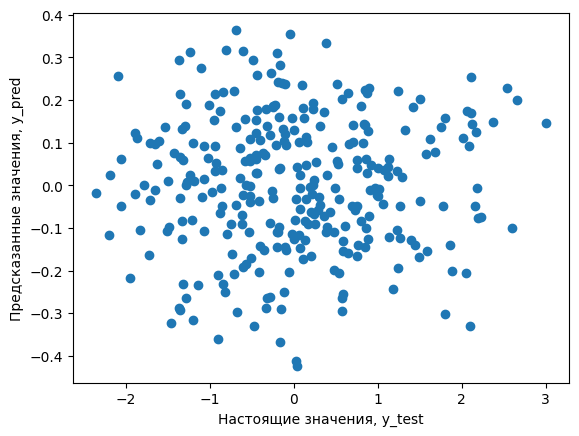

In [209]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения, y_test")
plt.ylabel("Предсказанные значения, y_pred")
plt.show()

In [210]:
y_test[:5]

array([-0.3128379 ,  0.82458215,  0.40142538,  2.05142452, -0.24429767])

In [211]:
y_pred[:5]

array([ 0.13997393,  0.09862492, -0.09849807, -0.20572085,  0.18403626])

In [212]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.8734377315592834
Mean Squared Error: 1.1652825795544235
Root Mean Squared Error: 1.079482551760066
r2: -0.014538906337974389


In [44]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,-0.072225
1,-0.166509
2,-0.170354
3,0.040855
4,0.445495
...,...
296,0.154399
297,-0.208481
298,-0.079043
299,0.090238


In [45]:
y_pred_df = scaler_y_1.inverse_transform(y_pred_df)
y_pred_df[:5]

array([[73.09381675],
       [72.80067027],
       [72.78871571],
       [73.44539926],
       [74.70349455]])

In [46]:
y_test_df = pd.DataFrame(y_test)
y_test_df[:3]

,0
0,-0.612330
1,-0.384139
2,0.894554


In [47]:
y_test_df = scaler_y_1.inverse_transform(y_test_df)

In [48]:
y_test_df[:5]

array([[71.41453524],
       [72.12402022],
       [76.09969661],
       [75.93480674],
       [71.78072473]])

In [49]:
residuals = y_test_df - y_pred_df
residuals.shape

(301, 1)

In [50]:
residuals[:3]

array([[-1.67928151],
       [-0.67665005],
       [ 3.3109809 ]])

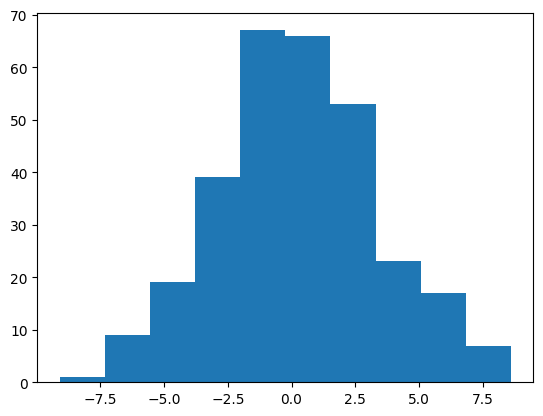

In [51]:
plt.hist(residuals);

In [52]:
print(residuals[np.argmax(np.abs(residuals))])

[-9.09343179]


In [53]:
print(residuals[np.argmin(np.abs(residuals))])

[0.00266274]


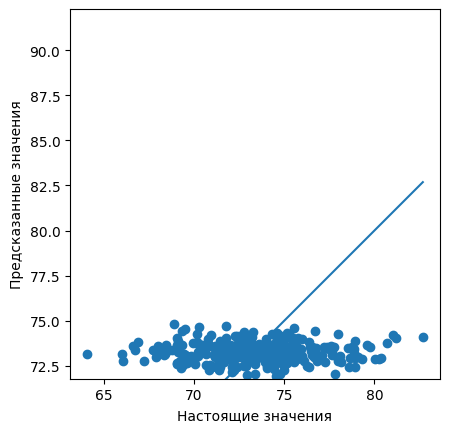

In [54]:
plt.scatter(y_test_df, y_pred_df)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")

plt.axis('square')
x = y = [np.min(y_test_df), np.max(y_test_df)]
plt.plot(x, y)
plt.show()

In [55]:
number = np.argmin(np.abs(residuals))
number

28

In [56]:
residuals[number]

array([0.00266274])

In [57]:
y_test_df[number]

array([73.28425585])

In [58]:
y_pred_df[number]

array([73.28159312])

In [59]:
str1 = f"Мод упруг при растяж = {regressor.intercept_} "
for coef, col in zip(regressor.coef_, X.columns):
   str1 += " + (" +str(np.round(coef, 3)) + ") * " + str(col)
str1

'Мод упруг при растяж = -0.01446671127970324  + (-0.016) * Matrix-Filler Ratio + (-0.058) * Density + (0.016) * Elastic Modulus + (-0.08) * Curing Agent Quantity + (0.069) * Epoxy Groups Content + (0.044) * Flash Point Temperature + (0.065) * Resin Consumption + (-0.05) * Layup Step + (0.023) * Surface Density_boxcox + (0.036) * Layup Density + (-0.041) * Layup_0 + (0.041) * Layup_90'

In [223]:
 # Загрузка DataFrame из сохраненного CSV-файла
df = pd.read_csv('composit_stand.csv')

df

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-1.067720,1.098244,0.026410,-1.131530,-0.012469,1.0,0.0,-0.933204
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-1.067720,1.098244,0.026410,-1.131530,0.230546,1.0,0.0,-0.933204
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-1.067720,1.098244,0.026410,-1.131530,1.040595,1.0,0.0,-0.933204
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-1.067720,1.098244,0.026410,-0.741243,-0.822518,1.0,0.0,-0.933204
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,-0.012469,1.0,0.0,-0.933204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-0.076219,-0.164054,-1.564572,0.849718,-0.820917,0.0,1.0,-0.936890
1019,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-0.130794,-0.219473,-1.686461,1.430947,-0.275671,0.0,1.0,-0.349307
1020,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.450935,0.403764,0.304549,-1.068634,0.848588,0.0,1.0,0.920115
1021,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,0.229077,-0.814204,-0.356695,-0.228717,0.089684,0.0,1.0,0.628830


In [224]:
numerical = ['Matrix-Filler Ratio', 'Density', 'Elastic Modulus',\
             'Curing Agent Quantity', 'Epoxy Groups Content','Flash Point Temperature',\
             'Surface Density_boxcox', 'Resin Consumption', 'Layup Step', 'Layup Density']

In [225]:
# Выбираем только числовые признаки
numerical_df = df[numerical]

In [226]:
# Количественно выбросы можно найти через стандартизированную оценку (z-оценку, z-score).
# Эта оценка показывает на сколько средних квадратических отклонений значение отличается от среднего
from scipy import stats
z = stats.zscore(df[numerical])
z=pd.DataFrame(z,columns=df[numerical].columns)
z.head()

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density_boxcox,Resin Consumption,Layup Step,Layup Density
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.933204,0.02641,-1.131530,-0.012469
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-0.933204,0.02641,-1.131530,0.230546
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.933204,0.02641,-1.131530,1.040595
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-0.933204,0.02641,-0.741243,-0.822518
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-0.933204,0.02641,-0.741243,-0.012469


In [227]:
# Общее количество выбросов в наборе данных
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), где хотя бы одно значение True (т.е. > 3)
numerical_df[(np.abs(z) > 3).any(axis = 1)]

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Surface Density_boxcox,Resin Consumption,Layup Step,Layup Density
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.933204,0.026410,-1.131530,-0.012469
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.933204,0.026410,-1.131530,1.040595
19,0.659497,0.057877,1.342372,0.045585,0.009757,-0.030955,1.650689,1.366293,-2.692680,-4.629749
41,-0.509611,-0.537848,0.959286,-1.388749,0.947556,-0.339818,-1.337914,0.144028,0.196049,-3.070361
100,0.696216,3.148712,-0.132621,-0.579277,0.548202,0.144706,-0.222504,3.077386,-0.931381,-0.840706
140,-2.344350,1.063720,0.414674,0.223414,0.549069,1.653823,0.635437,0.481856,-0.543429,3.325144
211,-0.256561,-0.216509,-2.160439,0.758826,-0.987721,1.560092,0.269758,3.285517,2.103042,1.287237
257,0.106163,-0.226939,0.534790,-3.282308,-0.115928,-0.155499,0.209591,0.456633,-0.459540,1.135602
279,1.647791,1.169496,-1.245331,-1.043041,0.402818,-1.002072,1.455276,-0.675920,-1.604373,-3.678741
298,-0.597362,2.080582,-0.454874,-1.407599,-3.321825,0.394929,0.732701,-2.112258,-0.877741,0.551057


In [359]:
# Выводим количество выбросов по каждому признаку
outliers_count = (np.abs(z) > 3).sum()
print(outliers_count)

Matrix-Filler Ratio        0
Density                    3
Elastic Modulus            2
Curing Agent Quantity      2
Epoxy Groups Content       2
Flash Point Temperature    3
Surface Density_boxcox     0
Resin Consumption          3
Layup Step                 0
Layup Density              7
dtype: int64


In [360]:
# ДАТАСЕТ БЕЗ ВЫБРОСОВ
outlier_mask = (np.abs(z) > 3).any(axis=1)

df_without_outliers = df[~outlier_mask]
df_without_outliers

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-1.067720,1.098244,0.026410,-1.131530,0.230546,1.0,0.0,-0.933204
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-1.067720,1.098244,0.026410,-0.741243,-0.822518,1.0,0.0,-0.933204
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,-0.012469,1.0,0.0,-0.933204
5,-0.177971,0.329272,0.024470,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,0.230546,1.0,0.0,-0.933204
6,-0.395218,-0.892008,0.203220,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,1.040595,1.0,0.0,-0.933204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-0.076219,-0.164054,-1.564572,0.849718,-0.820917,0.0,1.0,-0.936890
1019,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-0.130794,-0.219473,-1.686461,1.430947,-0.275671,0.0,1.0,-0.349307
1020,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.450935,0.403764,0.304549,-1.068634,0.848588,0.0,1.0,0.920115
1021,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,0.229077,-0.814204,-0.356695,-0.228717,0.089684,0.0,1.0,0.628830


In [361]:
df=df_without_outliers.copy()
df

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Tensile Elastic Modulus,Tensile Strength,Resin Consumption,Layup Step,Layup Density,Layup_0,Layup_90,Surface Density_boxcox
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-1.067720,1.098244,0.026410,-1.131530,0.230546,1.0,0.0,-0.933204
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-1.067720,1.098244,0.026410,-0.741243,-0.822518,1.0,0.0,-0.933204
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,-0.012469,1.0,0.0,-0.933204
5,-0.177971,0.329272,0.024470,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,0.230546,1.0,0.0,-0.933204
6,-0.395218,-0.892008,0.203220,0.045585,0.009757,-0.030955,-1.067720,1.098244,0.026410,-0.741243,1.040595,1.0,0.0,-0.933204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.721995,-0.320884,0.523926,-0.833694,-0.881925,0.950375,-0.076219,-0.164054,-1.564572,0.849718,-0.820917,0.0,1.0,-0.936890
1019,0.562741,1.008971,-0.894327,1.252072,-1.099577,-0.773808,-0.130794,-0.219473,-1.686461,1.430947,-0.275671,0.0,1.0,-0.349307
1020,0.383707,-0.045622,-0.978843,-0.001319,0.712276,-0.915350,0.450935,0.403764,0.304549,-1.068634,0.848588,0.0,1.0,0.920115
1021,0.849043,1.235730,0.004703,1.089990,-1.246274,-0.246860,0.229077,-0.814204,-0.356695,-0.228717,0.089684,0.0,1.0,0.628830


In [362]:
#df

#### 3.1 Линейная регрессия

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [233]:
# Выделение переменных X и Y
X = df[['Matrix-Filler Ratio','Density', 'Elastic Modulus', 'Curing Agent Quantity', \
        'Epoxy Groups Content', 'Flash Point Temperature', 'Resin Consumption', 'Layup Step', 'Surface Density_boxcox', \
         'Layup Density', 'Layup_0',  'Layup_90',]]
y_1 = df['Tensile Elastic Modulus']
y_2 = df['Tensile Strength']


# Разделение на обучающую и тестовую выборки
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size=0.3, random_state=42)

In [234]:
X.head(3)

,Matrix-Filler Ratio,Density,Elastic Modulus,Curing Agent Quantity,Epoxy Groups Content,Flash Point Temperature,Resin Consumption,Layup Step,Surface Density_boxcox,Layup Density,Layup_0,Layup_90
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,0.02641,-1.13153,-0.933204,-0.012469,1.0,0.0
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,0.02641,-1.13153,-0.933204,0.230546,1.0,0.0
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,0.02641,-1.13153,-0.933204,1.040595,1.0,0.0


In [235]:
y_2

0       1.098244
1       1.098244
2       1.098244
3       1.098244
4       1.098244
          ...   
1018   -0.164054
1019   -0.219473
1020    0.403764
1021   -0.814204
1022    0.802253
Name: Tensile Strength, Length: 1023, dtype: float64

In [236]:
model = LinearRegression()
model.fit(X_train, y_2_train)

# Прогнозирование
y_pred = model.predict(X_test)



#  Оценка модели
mse = mean_squared_error(y_2_test, y_pred)
r2 = r2_score(y_1_test, y_pred)
mae = mean_absolute_error(y_2_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.9462518942316825
R-squared (R2): -0.005512208964439047
Mean Absolute Error (MAE): 0.7808596691955044


In [237]:
model.score(X_train, y_2_train)

0.02206349454473444

In [238]:
y_pred[:5]

array([ 0.07818474,  0.02605174, -0.0163042 ,  0.11648136,  0.05268088])

In [239]:
y_1_test[:5]

525    1.235697
357    1.232619
444    0.147957
31    -0.763757
618   -0.203163
Name: Tensile Elastic Modulus, dtype: float64

In [240]:
import pickle
pickle.dump(model, open('lr_model.pkl','wb'))

In [241]:
model_load=pickle.load(open('lr_model.pkl','rb'))

In [242]:
model_load.predict(X_test [:5])

array([ 0.07818474,  0.02605174, -0.0163042 ,  0.11648136,  0.05268088])

In [243]:
print(model.coef_)

[ 0.03432952 -0.06931835  0.04470267 -0.07110819 -0.00961288 -0.03632606
  0.04001154 -0.04514068  0.03388094  0.05828385  0.00430622 -0.00430622]


In [244]:

prediction_df = pd.DataFrame({'Actual': y_1_test, 'Predicted': y_pred})
prediction_df.head(3)

,Actual,Predicted
525,1.235697,0.078185
357,1.232619,0.026052
444,0.147957,-0.016304


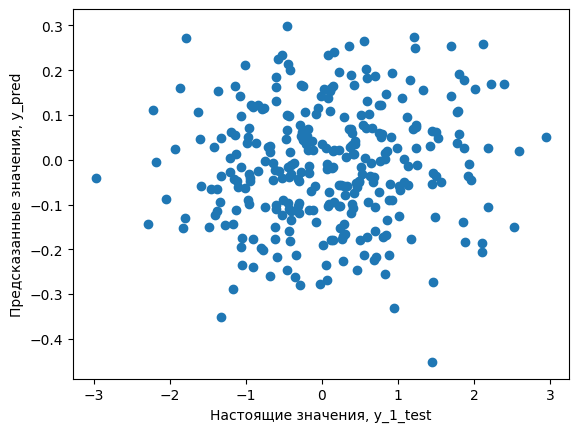

In [245]:
import matplotlib.pyplot as plt
plt.scatter(y_1_test, y_pred)
plt.xlabel("Настоящие значения, y_1_test")
plt.ylabel("Предсказанные значения, y_pred")
plt.show()

In [246]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.tail()

,0
302,0.165476
303,0.255286
304,-0.074155
305,-0.254918
306,-0.114847


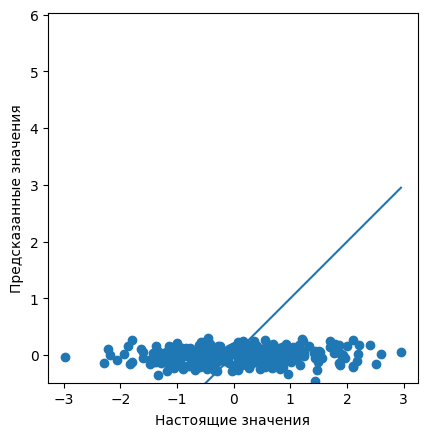

In [247]:
plt.scatter(y_1_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")

plt.axis('square')
x = y = [np.min(y_1_test), np.max(y_1_test)]
plt.plot(x, y)
plt.show()

In [248]:
# Определение параметров
parameters = {
    'fit_intercept': [True, False],
}


model = LinearRegression()


grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10)


grid_search.fit(X_train, y_2_train)

# Вывод наилучших параметров и оценки
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)


best_model = grid_search.best_estimator_

# Прогнозирование с использованием лучшей модели
y_pred_best = best_model.predict(X_test)

# Оценка лучшей модели
mse_best = mean_squared_error(y_2_test, y_pred_best)
r2_best = r2_score(y_2_test, y_pred_best)
mae_best = mean_absolute_error(y_2_test, y_pred_best)

print("Best model evaluation:")
print("Mean Squared Error (MSE):", mse_best)
print("R-squared (R2):", r2_best)
print("Mean Absolute Error (MAE):", mae_best)

Best parameters found:  {'fit_intercept': True}
Best score found:  -0.04134636356278384
Best model evaluation:
Mean Squared Error (MSE): 0.9462518942316825
R-squared (R2): 0.0044529186663170295
Mean Absolute Error (MAE): 0.7808596691955044


In [249]:
grid_search.score(X_train, y_2_train)

0.02206349454473444

In [250]:
from sklearn.linear_model import Lasso, Ridge


lasso_model = Lasso(alpha=0.1)


lasso_model.fit(X_train, y_1_train)


ridge_model = Ridge(alpha=0.1)


ridge_model.fit(X_train, y_1_train)


lasso_y_pred = lasso_model.predict(X_test)


ridge_y_pred = ridge_model.predict(X_test)

# Оценка моделей Lasso и Ridge
lasso_mse = mean_squared_error(y_1_test, lasso_y_pred)
ridge_mse = mean_squared_error(y_1_test, ridge_y_pred)

print("Lasso Mean Squared Error (MSE):", lasso_mse)
print("Ridge Mean Squared Error (MSE):", ridge_mse)
print("R-squared(r2):", r2)

Lasso Mean Squared Error (MSE): 1.0390033194736867
Ridge Mean Squared Error (MSE): 1.0417114733043251
R-squared(r2): -0.005512208964439047


In [252]:
print(ridge_model.score(X_train, y_2_train))
print(lasso_model.score(X_train, y_2_train))

-0.0014377692428491073
-0.0011296720288460627


In [130]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


poly_features = PolynomialFeatures(degree=2)


X_poly = poly_features.fit_transform(X)


X_poly_train, X_poly_test, y_1_train, y_1_test = train_test_split(X_poly, y_1, test_size=0.3, random_state=42)


lasso_poly_model = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.1))


lasso_poly_model.fit(X_poly_train, y_1_train)


ridge_poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.1))


ridge_poly_model.fit(X_poly_train, y_1_train)


lasso_poly_y_pred = lasso_poly_model.predict(X_poly_test)
ridge_poly_y_pred = ridge_poly_model.predict(X_poly_test)


lasso_poly_mse = mean_squared_error(y_1_test, lasso_poly_y_pred)
ridge_poly_mse = mean_squared_error(y_1_test, ridge_poly_y_pred)

print("Lasso with Polynomial Features Mean Squared Error (MSE):", lasso_poly_mse)
print("Ridge with Polynomial Features Mean Squared Error (MSE):", ridge_poly_mse)

Lasso with Polynomial Features Mean Squared Error (MSE): 1.0693378320821534
Ridge with Polynomial Features Mean Squared Error (MSE): 11.46827588238752


#### 3.2 Метод опорных векторов

In [254]:
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size=0.3, random_state=42)
svm_model = SVR(kernel='rbf')
#svm_model.fit(X_train, y_1_train)

svm_model.fit(X_train, y_2_train)

# Прогнозирование для модели SVM
svm_y_pred = svm_model.predict(X_test)

# Оценка модели SVM
svm_mse = mean_squared_error(y_2_test, svm_y_pred)
svm_mae = mean_absolute_error(y_2_test, svm_y_pred)
svmr2 = r2_score(y_2_test, svm_y_pred)

print("SVM Mean Squared Error (MSE):", svm_mse)
print("SVM Mean Absolute Error (MAE):", svm_mae)
print("R2 score:",svmr2)

SVM Mean Squared Error (MSE): 1.0663490676642184
SVM Mean Absolute Error (MAE): 0.8294370385076164
R2 score: -0.12190074172372722


In [255]:
svm_model.score(X_train, y_2_train)

0.32601383474039425

In [256]:
# Определение параметров
parameters = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto']
}


svm_model = SVR(kernel='rbf')


grid_search = GridSearchCV(estimator=svm_model, param_grid=parameters,scoring='r2', cv=10)


grid_search.fit(X_train, y_2_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Получение лучшей модели
best_model = grid_search.best_estimator_

# Прогнозирование с использованием лучшей модели
svm_y_pred_best = best_model.predict(X_test)

# Оценка лучшей модели
svm_mse_best = mean_squared_error(y_2_test, svm_y_pred_best)
svm_mae_best = mean_absolute_error(y_2_test, svm_y_pred_best)
svm_r2_best=r2_score(y_2_test, svm_y_pred_best)

print("SVM Best model evaluation:")
print("SVM Mean Squared Error (MSE):", svm_mse_best)
print("SVM Mean Absolute Error (MAE):", svm_mae_best)
print("R2 score:",svm_r2_best)

Best parameters found:  {'C': 0.1, 'gamma': 'auto'}
Best score found:  -0.027205690334344956
SVM Best model evaluation:
SVM Mean Squared Error (MSE): 0.9657500945149333
SVM Mean Absolute Error (MAE): 0.7900141766644506
R2 score: -0.01606104437204614


#### 3.3 Случайный лес

In [269]:

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_2_train)
print(" r2 score : ", rf_model.score(X_train, y_2_train))

y_pred_rf = rf_model.predict(X_test)

# Оценка модели
mse_rf = mean_squared_error(y_2_test, y_pred_rf)
r2_rf = r2_score(y_2_test, y_pred_rf)
mae_rf = mean_absolute_error(y_2_test, y_pred_rf)

print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest R-Squared (R2):", r2_rf)
print("Random Forest Mean Absolute Error (MAE):", mae_rf)

 r2 score :  0.8527436129388618
Random Forest Mean Squared Error (MSE): 0.985037061300314
Random Forest R-Squared (R2): -0.036352769660010775
Random Forest Mean Absolute Error (MAE): 0.7948136510372035


In [265]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

#X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size=0.3, random_state=42)
# Определение параметров
parameters = {
    'n_estimators': [10, 20, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf_model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters,scoring='r2', cv=10)


grid_search.fit(X_train, y_2_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

# Оценка лучшей модели
mse_best = mean_squared_error(y_2_test, y_pred_best)
r2_best = r2_score(y_2_test, y_pred_best)
mae_best = mean_absolute_error(y_2_test, y_pred_best)

print("Random Forest Best model evaluation:")
print("Mean Squared Error (MSE):", mse_best)
print("R-squared (R2):", r2_best)
print("Mean Absolute Error (MAE):", mae_best)

C:\Users\AsusNB\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AsusNB\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AsusNB\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\AsusNB\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best score found:  -0.029775400592684166
Random Forest Best model evaluation:
Mean Squared Error (MSE): 0.9461088572050125
R-squared (R2): 0.004603407236318358
Mean Absolute Error (MAE): 0.7786884282826341


#### 3.4 Градиентный бустинг

In [272]:

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_2_train)


y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_2_test, y_pred_gb)
r2_gb = r2_score(y_2_test, y_pred_gb)
mae_gb = mean_absolute_error(y_2_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting R-squared (R2):", r2_gb)
print("Gradient Boosting Mean Absolute Error (MAE):", mae_gb)

Gradient Boosting Mean Squared Error (MSE): 0.9944090220085658
Gradient Boosting R-squared (R2): -0.04621296458944846
Gradient Boosting Mean Absolute Error (MAE): 0.8103102376442748


In [273]:
gb_model.score(X_train, y_2_train)

0.4663900882602542

In [162]:
param_grid_gb = {
    'n_estimators': [3, 5, 10],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}


gb_model = GradientBoostingRegressor(random_state=42)


grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=10, scoring='neg_mean_squared_error')


grid_search_gb.fit(X_train, y_2_train)

# Вывод результатов
print("Наилучшие параметры для GradientBoostingRegressor:", grid_search_gb.best_params_)
print("Наилучшая среднеквадратическая ошибка (MSE) для GradientBoostingRegressor:", -grid_search_gb.best_score_)

# Получение наилучшей модели после обучения
best_gb_model = grid_search_gb.best_estimator_

# Предсказание на тестовом наборе данных
y_gb_pred = best_gb_model.predict(X_test)

# Вычисление МАЕ и R2 для GradientBoostingRegressor
gb_mae = mean_absolute_error(y_2_test, y_gb_pred)
gb_r2 = r2_score(y_2_test, y_gb_pred)


# Вывод результатов для GradientBoostingRegressor
print("Средняя абсолютная ошибка (MAE) для GradientBoostingRegressor:", gb_mae)
print("R-squared (R2) для GradientBoostingRegressor:", gb_r2)
print("GradientBoostingRegresso Mean Squared Error (MSE):", mse_gb)

Наилучшие параметры для GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 3}
Наилучшая среднеквадратическая ошибка (MSE) для GradientBoostingRegressor: 1.0185708472713226
Средняя абсолютная ошибка (MAE) для GradientBoostingRegressor: 0.780809980474576
R-squared (R2) для GradientBoostingRegressor: -0.002583842106243406
GradientBoostingRegresso Mean Squared Error (MSE): 0.9944090220085658


####**4. Разработка нейронной сети**

In [319]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.initializers import he_normal
from keras.initializers import glorot_uniform, lecun_uniform, random_uniform, random_normal, TruncatedNormal
import matplotlib.pyplot as plt  # Для построения графиков

In [320]:
#pip install keras
#!pip install tensorflow

In [321]:
# Загрузка данных
df = pd.read_csv('composit_stand.csv')

# Подготовка данных
X = df.drop(columns=['Matrix-Filler Ratio'])  # Все признаки, кроме Matrix-Filler Ratio
y = df['Matrix-Filler Ratio']  # Целевая переменная - оптимальное соотношение Matrix-Filler Ratio

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [322]:
X_train.shape[1]

13

In [358]:
# Создание нейронной сети с инициализацией весов
model = Sequential()
model.add(Dense(256, activation='relu', kernel_initializer=glorot_uniform(), input_shape=(X_train.shape[1], )))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform()))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer=glorot_uniform()))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer=glorot_uniform()))
model.add(Dense(1))#, activation='linear'))

In [347]:
print(model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [348]:
# Компиляция модели с настройкой learning_rate
optimizer = Adam(learning_rate=0.001)  # Вы можете изменить этот параметр
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [349]:
# Обучение модели
history=model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.3)
history

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.0120 - mae: 0.8053 - val_loss: 0.9892 - val_mae: 0.8004
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0023 - mae: 0.7843 - val_loss: 0.9584 - val_mae: 0.7818
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0195 - mae: 0.7947 - val_loss: 0.9626 - val_mae: 0.7831
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9926 - mae: 0.7947 - val_loss: 0.9667 - val_mae: 0.7860
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0239 - mae: 0.8047 - val_loss: 0.9584 - val_mae: 0.7822
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8796 - mae: 0.7453 - val_loss: 0.9589 - val_mae: 0.7823
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9687 - mae: 0.7793 - val_loss: 0.9623 - val_mae: 0.7849
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0847 - mae: 0.8249 - val_loss: 0.9631 - val_mae: 0.7870
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9716 -

In [350]:
# Оценка модели
mae, mse = model.evaluate(X_test, y_test)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0183 - mae: 0.8352
Mean Squared Error (MSE): 0.8321675658226013
Mean Absolute Error (MAE): 1.0320611000061035
R-squared (R2): -0.005512208964439047


In [351]:
#history.history

In [352]:

    
#plt.plot(history.history['mae'], 
#         label='Средняя абсолютная ошибка на обучающем наборе')
#plt.plot(history.history['val_mae'], 
#         label='Средняя абсолютная ошибка на проверочном наборе')
#plt.xlabel('Эпоха обучения')
#plt.ylabel('Средняя абсолютная ошибка')
#plt.legend()
#plt.show()

In [353]:
#plt.plot(history.history['loss'], label="loss")
#plt.plot(history.history['val_loss'], label="val_loss")
#plt.legend()

In [354]:
# Выбираем одну строку из тестовой выборки
index_to_predict = 100  # Индекс строки
sample_to_predict = X_test.iloc[index_to_predict:index_to_predict+1]  # Выбор одной строки из тестовой выборки

prediction = model.predict(sample_to_predict)

print("Предсказанное значение Matrix-Filler Ratio:", prediction[0][0])
print("Фактическое значение Matrix-Filler Ratio для этой строки:", y_test.iloc[index_to_predict])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Предсказанное значение Matrix-Filler Ratio: 0.071900174
Фактическое значение Matrix-Filler Ratio для этой строки: -1.8498112641836035


In [355]:
pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


In [356]:
res=prediction[0][0]- y_test.iloc[index_to_predict]
res

1.9217114382053244

####**5. Разработка приложения**

In [ ]:
# Создаем Python-скрипт  и выкладываем в папку. Затем заходим в командную строку, переходим по пути в папку где лежит Python-скрипт и туда же кладем
#  composit_stand.csv. Далее запускаем командную строку и вводим значения наших переменных, после чего производится рассчет целевого значения
import argparse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd


def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, r2, mae

def get_user_input(X_columns):
    user_input = {}
    for column in X_columns:
        value = input(f"Введите значение для признака '{column}': ")
        user_input[column] = float(value)
    return user_input

def main():
    # Обработка аргументов командной строки
    parser = argparse.ArgumentParser(description='Linear Regression Prediction')
    parser.add_argument('data_file', type=str, help='Path to data file')
    args = parser.parse_args()

    # Загрузка данных из файла
    data = pd.read_csv(args.data_file)
    X = data.drop(columns=['Tensile Elastic Modulus', 'Tensile Strength'])
    y = data['Tensile Elastic Modulus']

     # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Обучение модели
    model = train_model(X_train, y_train)

    # Оценка модели
    mse, r2, mae = evaluate_model(model, X_test, y_test)

    # Вывод результатов
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print("Mean Absolute Error (MAE):", mae)

    # Получение пользовательского ввода и предсказание
    user_input = get_user_input(X.columns)
    user_input_df = pd.DataFrame([user_input])
    prediction = model.predict(user_input_df)
    print("Предсказанное значение:", prediction[0])

if __name__ == "__main__":
    main()
    